In [1]:
import numpy as np

import matplotlib.image as mpimg
from matplotlib import pyplot as plt

import digit_recognition

In [2]:
file = './/attachments//ha_temp_16_20251217_235110_197666296.png'

In [3]:
img = mpimg.imread(file)

gray = img[..., :3].mean(axis=2)

line_mask = (gray > 0.6) * 1

tick_labels_pixels = {
    'upper_left'   : line_mask[ 56:65 , 22:29], # upper label, left   digit
    'upper_middle' : line_mask[ 56:65 , 30:37], # upper label, middle digit
    'upper_right'  : line_mask[ 56:65 , 38:45], # upper label, right  digit
    'lower_left'   : line_mask[256:265, 22:29], # lower label, left   digit
    'lower_middle' : line_mask[256:265, 30:37], # lower label, middle digit
    'lower_right'  : line_mask[256:265, 38:45], # lower label, right  digit
}

tick_labels_pixels['upper_right']

array([[1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1]])

(np.float64(-0.5), np.float64(6.5), np.float64(8.5), np.float64(-0.5))

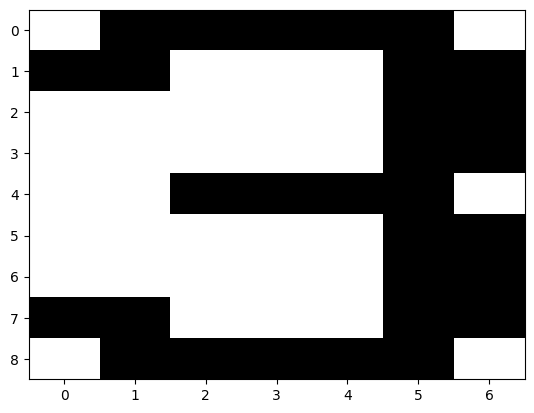

In [4]:
plt.imshow(tick_labels_pixels['upper_right'], cmap='gray')
plt.axis('equal')
plt.axis('tight')

In [5]:
tick_labels_numbers = tick_labels_pixels.copy()
for key in tick_labels_pixels:
    tick_labels_numbers[key], min_residual = digit_recognition.recognize_digit(tick_labels_pixels[key])
    print(f'{key} residual: {min_residual}')

y_max = int(tick_labels_numbers['upper_left'] + tick_labels_numbers['upper_middle'] + tick_labels_numbers['upper_right'])
y_min = int(tick_labels_numbers['lower_left'] + tick_labels_numbers['upper_middle'] + tick_labels_numbers['lower_right'])

[y_min, y_max]

upper_left residual: 0
upper_middle residual: 0
upper_right residual: 0
lower_left residual: 0
lower_middle residual: 0
lower_right residual: 0


[5, 3]

In [6]:
zero_mask = (line_mask == 0)
line_y = zero_mask.argmax(axis=0).astype(float)
line_y[~zero_mask.any(axis=0)] = np.nan

# convert pixels to values
# y-pixel 267 corresponds to temperature y_min
# y-pixel  66 corresponds to temperature y_max
temp = (line_y[49:-26] - 267) * (y_max - y_min) / (66 - 267) + y_min

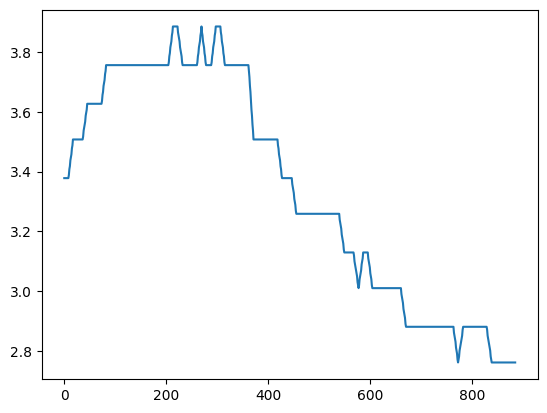

In [7]:
plt.plot(temp)

(np.float64(-0.5), np.float64(959.5), np.float64(299.5), np.float64(-0.5))

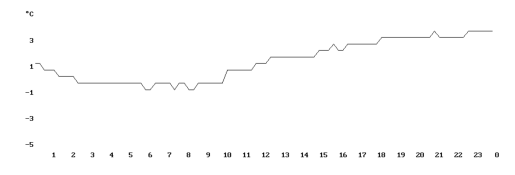

In [8]:
plt.imshow(line_mask, cmap='gray')
plt.axis('off')